In [ ]:
import numpy as np
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from pathlib import Path
import matplotlib.style
import matplotlib as mpl
import torch

import shap

DEVICE = torch.device("cuda")
SEED = 76436278

torch.manual_seed(SEED)
mpl.style.use("default")

checkpoint = torch.load('./model.pt')

fig_path = Path(f"./figures/")
fig_path.mkdir(parents=True, exist_ok=True)

In [ ]:
from src.maldi2resistance.data.driams import Driams

driams = Driams(
    root_dir="/home/jan/Uni/master/data/Driams",
    antibiotics= checkpoint["selected_antibiotics"],
)

driams.loading_type = "memory"

driams.label_stats

Columns (71) have mixed types. Specify dtype option on import or set low_memory=False.
100%|██████████| 54840/54840 [00:11<00:00, 4648.28it/s]


,Amikacin,Amoxicillin-Clavulanic acid,Ampicillin,Ampicillin-Amoxicillin,Aztreonam,Benzylpenicillin,Cefazolin,Cefepime,Cefpodoxime,Ceftazidime,...,Norfloxacin,Oxacillin,Penicillin,Piperacillin-Tazobactam,Polymyxin B,Rifampicin,Teicoplanin,Tetracycline,Tobramycin,Vancomycin
positive,1068,13366,8578,21966,628,618,4223,7383,2338,3470,...,1205,5537,12431,7616,486,580,244,3534,1707,227
negative,20941,24992,4194,4905,456,457,5813,31567,4382,24566,...,7031,7740,4286,31308,2305,14964,8486,10376,16809,20540
n_sum,22009,38358,12772,26871,1084,1075,10036,38950,6720,28036,...,8236,13277,16717,38924,2791,15544,8730,13910,18516,20767


In [ ]:
from maldi2resistance.model.MLP import AeBasedMLP

model = AeBasedMLP(input_dim=18000, output_dim=len(driams.selected_antibiotics))
model.load_state_dict(checkpoint['model_state_dict'])

model.eval()

AeBasedMLP(
  (encoder): Encoder(
    (input): Linear(in_features=18000, out_features=4096, bias=True)
    (layer_1): Linear(in_features=4096, out_features=4096, bias=True)
    (layer_2): Linear(in_features=4096, out_features=2048, bias=True)
    (LeakyReLU): LeakyReLU(negative_slope=0.2)
  )
  (decoder): Decoder(
    (input): Linear(in_features=2048, out_features=4096, bias=True)
    (layer_1): Linear(in_features=4096, out_features=4096, bias=True)
    (layer_2): Linear(in_features=4096, out_features=38, bias=True)
    (LeakyReLU): LeakyReLU(negative_slope=0.2)
  )
)

In [ ]:
from torch.utils.data import DataLoader

test_size = len(driams)
test_loader = DataLoader(driams, batch_size= test_size, shuffle=True)
test_features, test_labels = next(iter(test_loader))

In [ ]:
model = model.to(DEVICE)

#test_features = test_features.to(DEVICE)
#test_labels = test_labels.to(DEVICE)

In [ ]:
from captum.attr import IntegratedGradients
from captum.attr import LayerConductance
from captum.attr import NeuronConductance

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/548 [00:00<?, ?it/s]

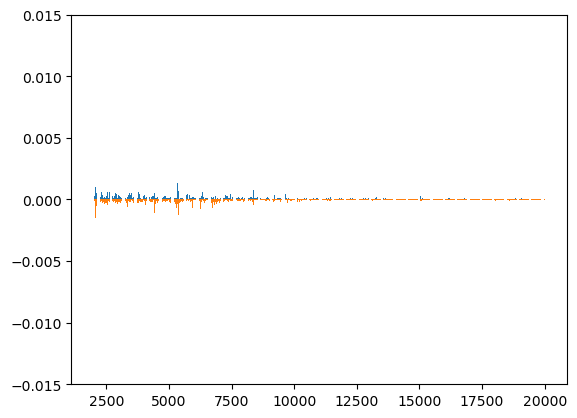

  0%|          | 0/548 [00:00<?, ?it/s]

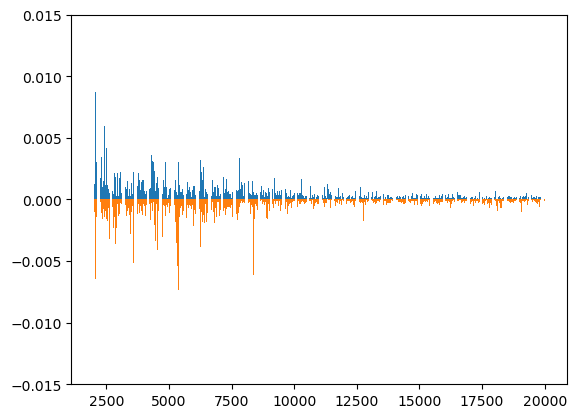

  0%|          | 0/548 [00:00<?, ?it/s]

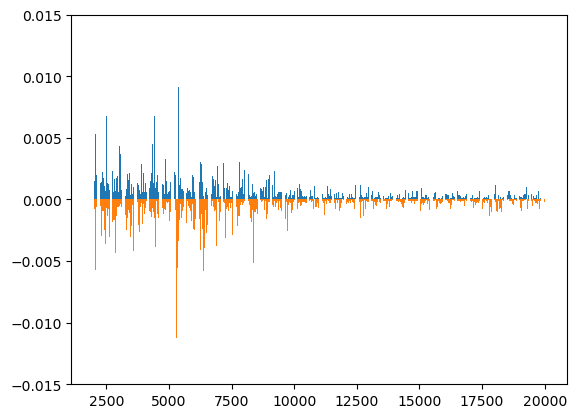

  0%|          | 0/548 [00:00<?, ?it/s]

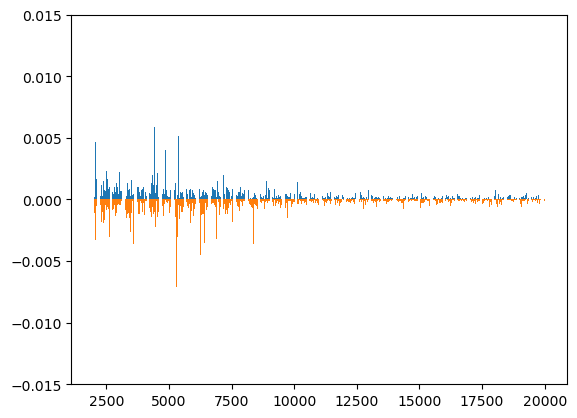

  0%|          | 0/548 [00:00<?, ?it/s]

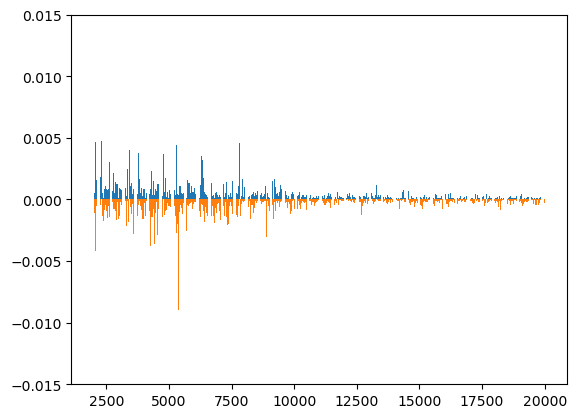

  0%|          | 0/548 [00:00<?, ?it/s]

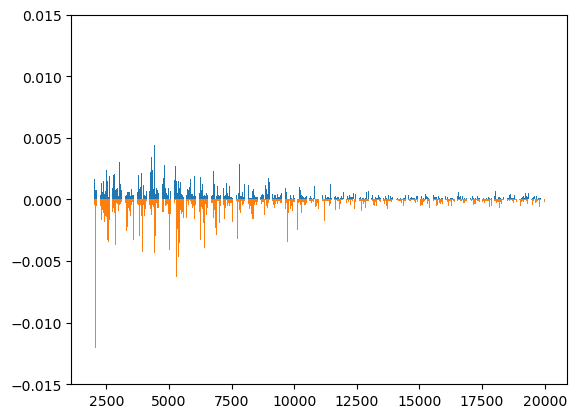

  0%|          | 0/548 [00:00<?, ?it/s]

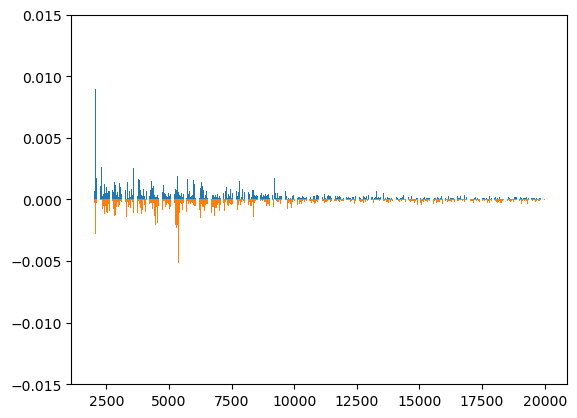

  0%|          | 0/548 [00:00<?, ?it/s]

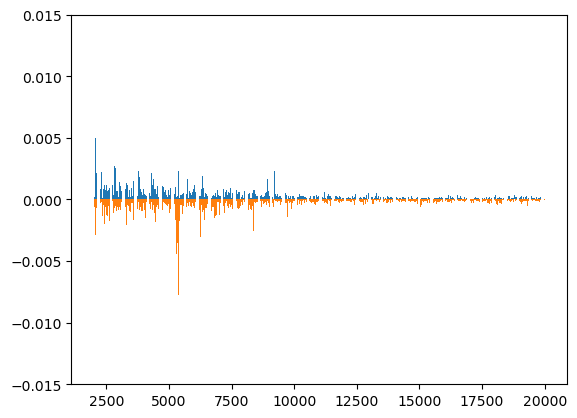

  0%|          | 0/548 [00:00<?, ?it/s]

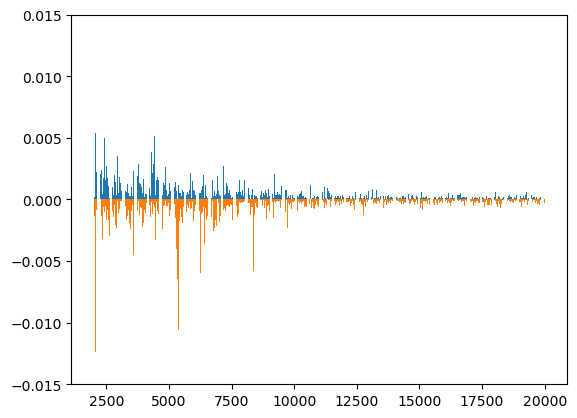

  0%|          | 0/548 [00:00<?, ?it/s]

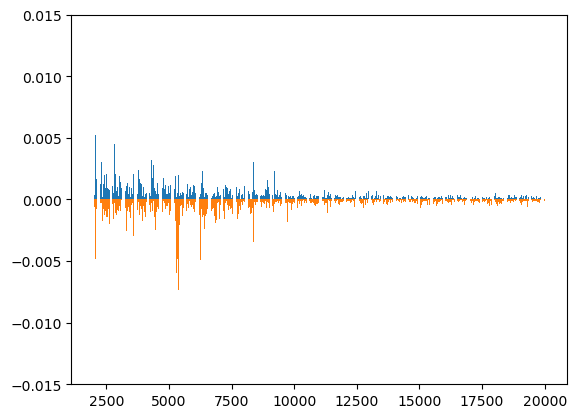

  0%|          | 0/548 [00:00<?, ?it/s]

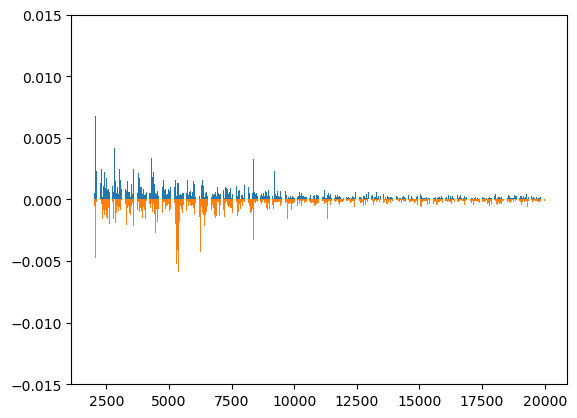

  0%|          | 0/548 [00:00<?, ?it/s]

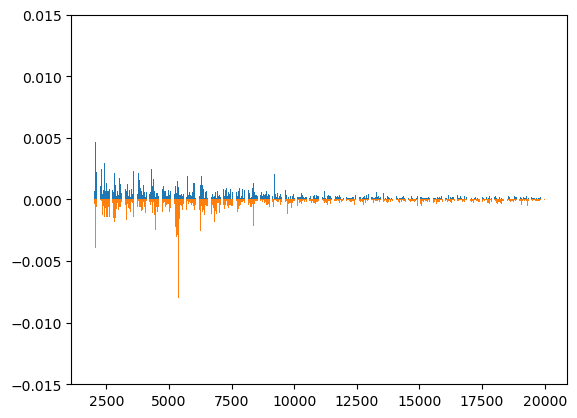

  0%|          | 0/548 [00:00<?, ?it/s]

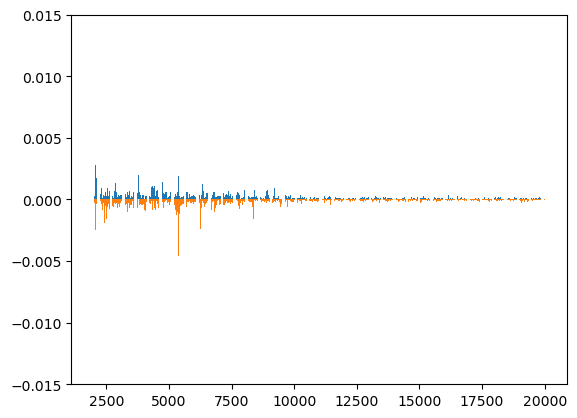

  0%|          | 0/548 [00:00<?, ?it/s]

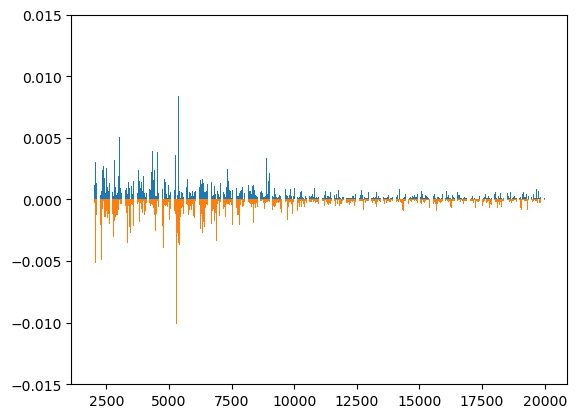

  0%|          | 0/548 [00:00<?, ?it/s]

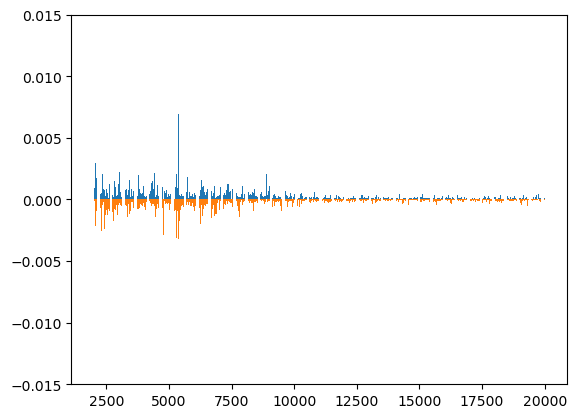

  0%|          | 0/548 [00:00<?, ?it/s]

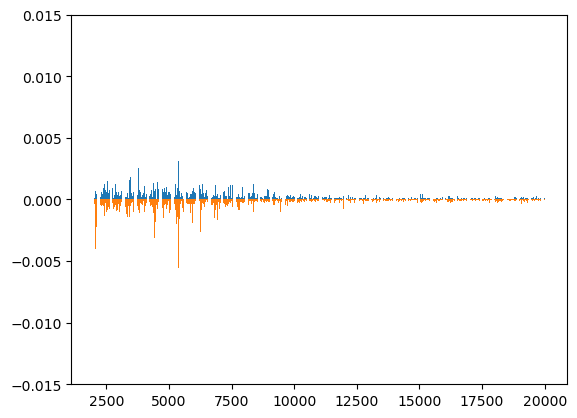

  0%|          | 0/548 [00:00<?, ?it/s]

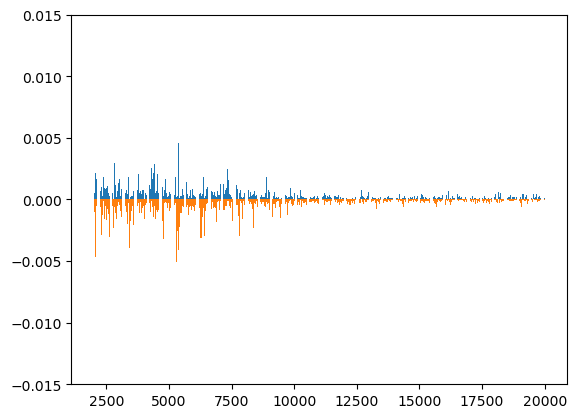

  0%|          | 0/548 [00:00<?, ?it/s]

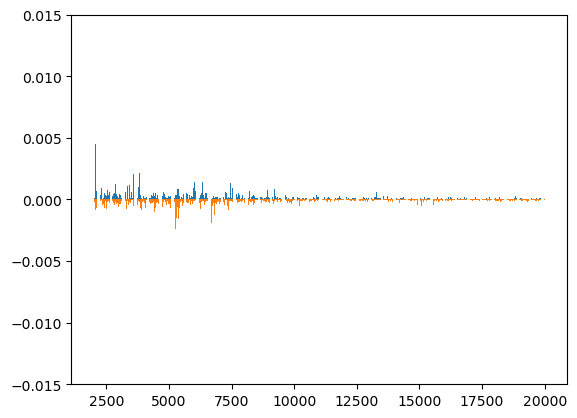

  0%|          | 0/548 [00:00<?, ?it/s]

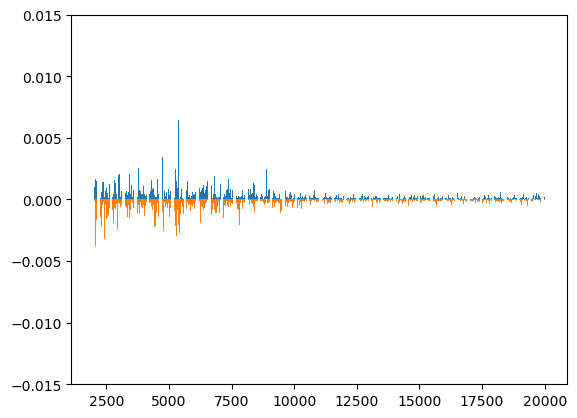

  0%|          | 0/548 [00:00<?, ?it/s]

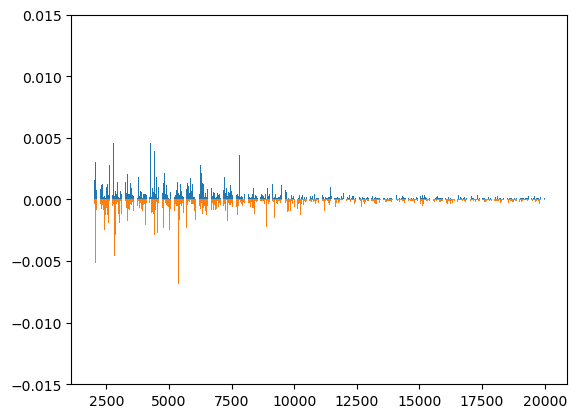

  0%|          | 0/548 [00:00<?, ?it/s]

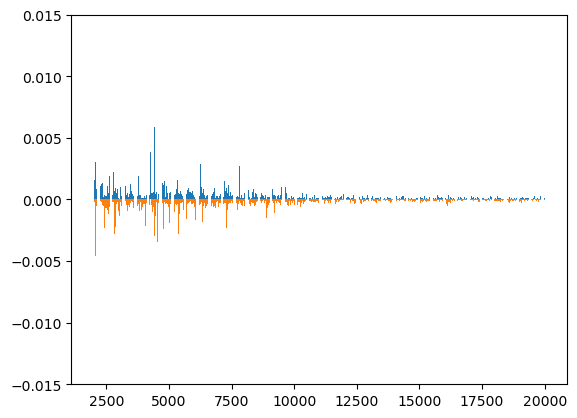

  0%|          | 0/548 [00:00<?, ?it/s]

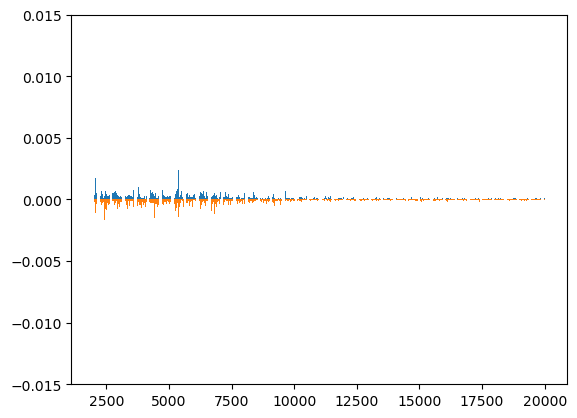

  0%|          | 0/548 [00:00<?, ?it/s]

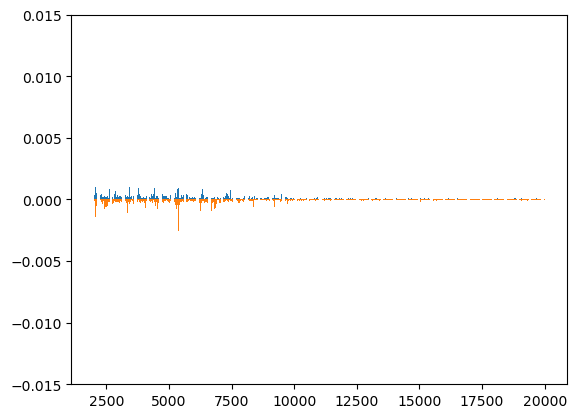

  0%|          | 0/548 [00:00<?, ?it/s]

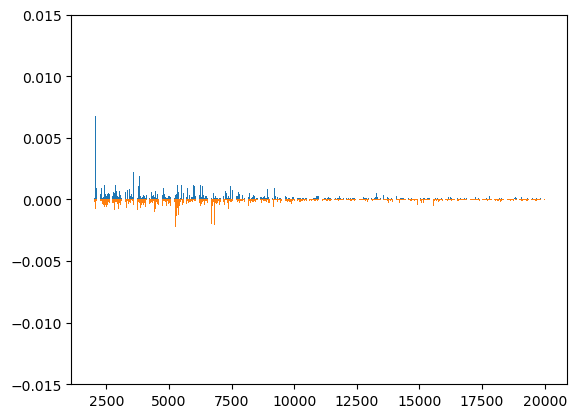

  0%|          | 0/548 [00:00<?, ?it/s]

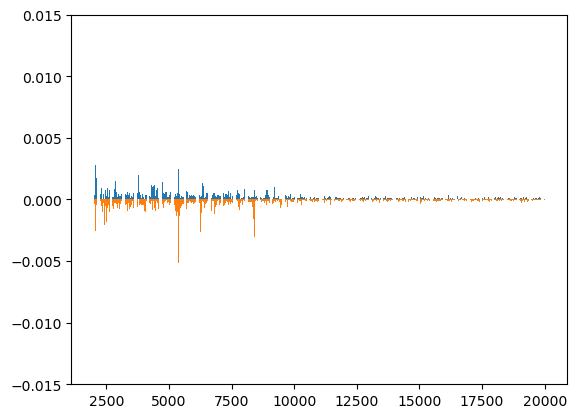

  0%|          | 0/548 [00:00<?, ?it/s]

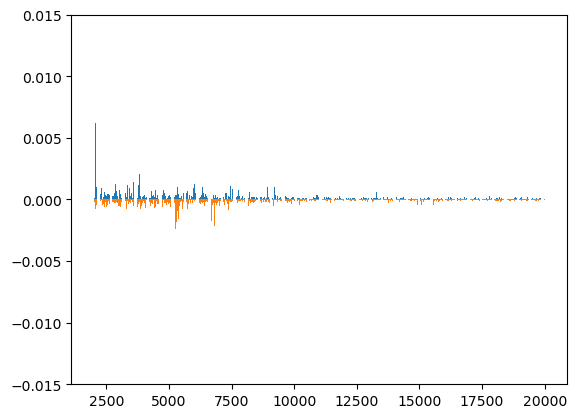

  0%|          | 0/548 [00:00<?, ?it/s]

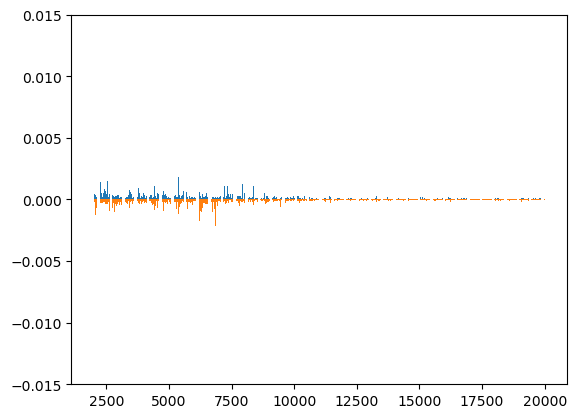

  0%|          | 0/548 [00:00<?, ?it/s]

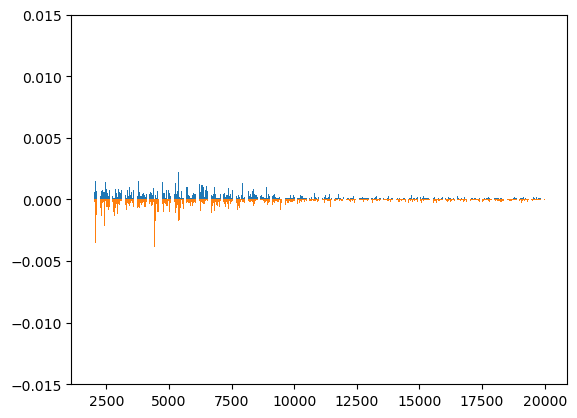

  0%|          | 0/548 [00:00<?, ?it/s]

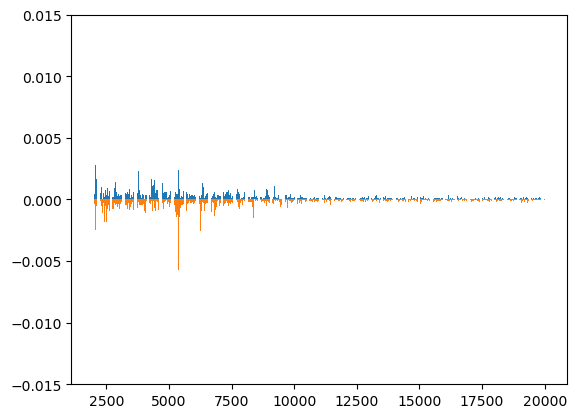

  0%|          | 0/548 [00:00<?, ?it/s]

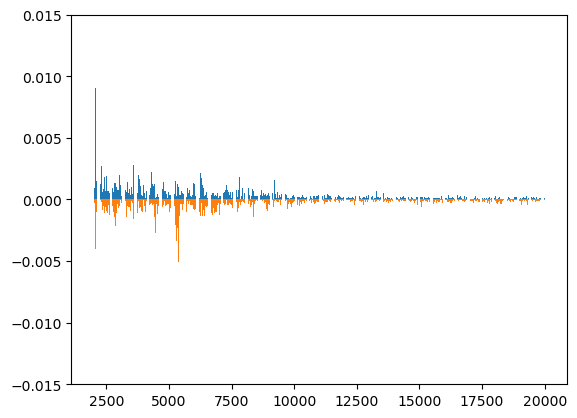

  0%|          | 0/548 [00:00<?, ?it/s]

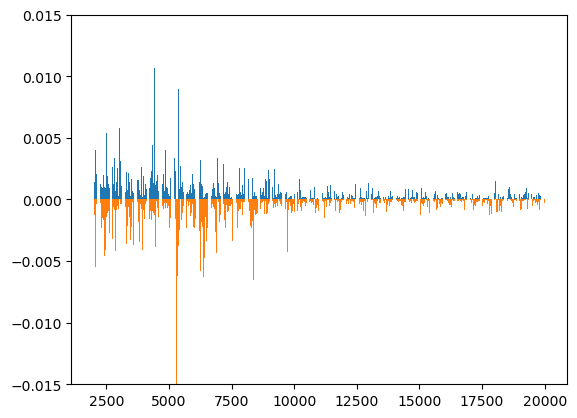

  0%|          | 0/548 [00:00<?, ?it/s]

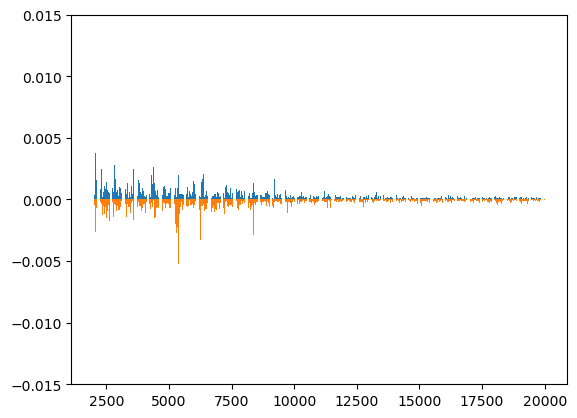

  0%|          | 0/548 [00:00<?, ?it/s]

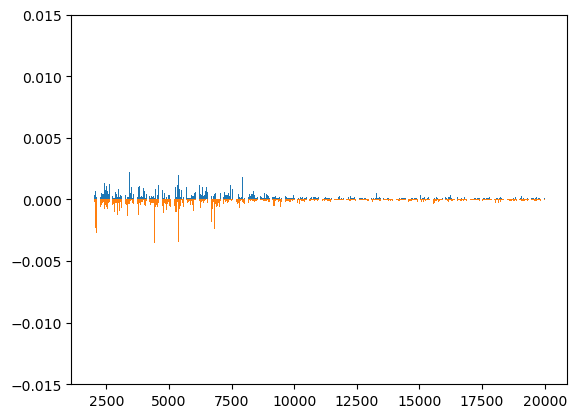

  0%|          | 0/548 [00:00<?, ?it/s]

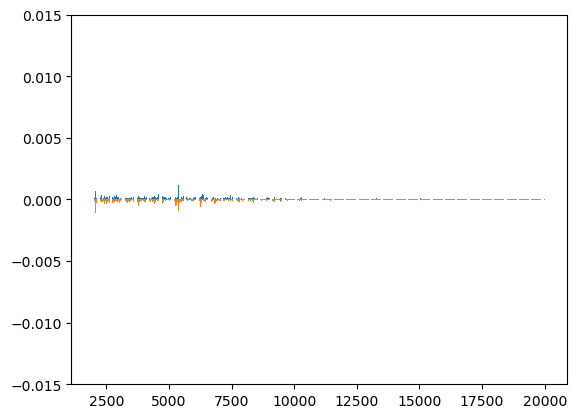

  0%|          | 0/548 [00:00<?, ?it/s]

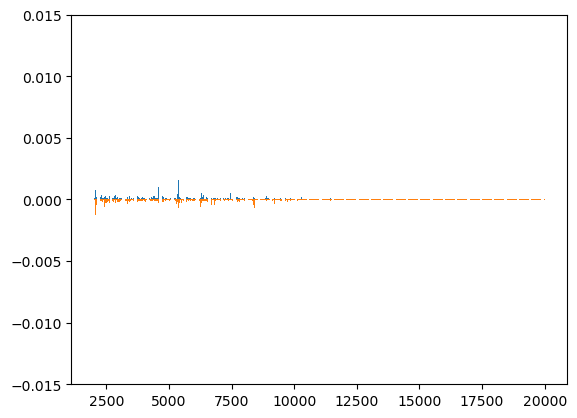

  0%|          | 0/548 [00:00<?, ?it/s]

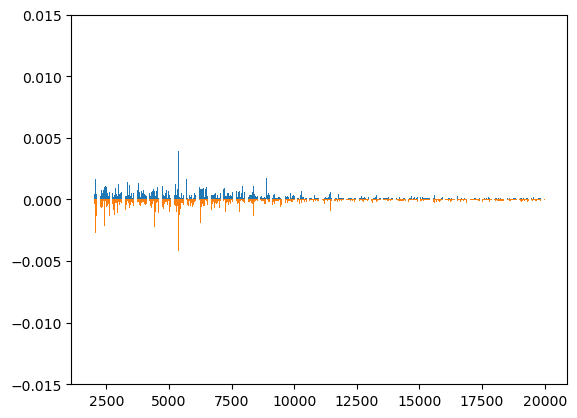

  0%|          | 0/548 [00:00<?, ?it/s]

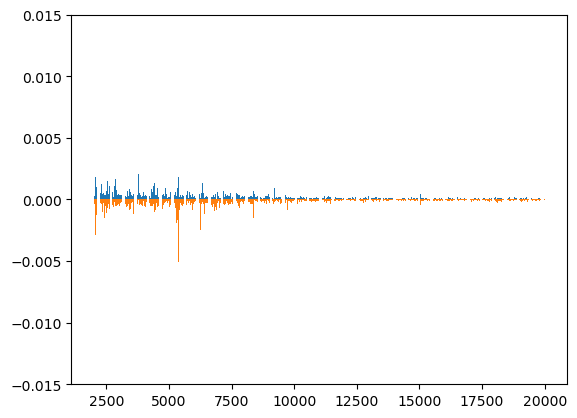

  0%|          | 0/548 [00:00<?, ?it/s]

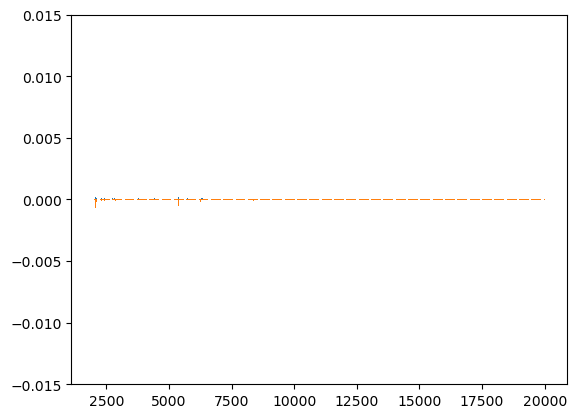

In [ ]:
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import gc

for antibiotic in tqdm(driams.selected_antibiotics):
    ig = IntegratedGradients (model)
    pos = driams.selected_antibiotics.index(antibiotic)
    
    i = 0
    results = []
    for idx in tqdm(range(100,test_size, 100)):
        feature_part = test_features[i:idx,:].to(DEVICE)
        label_part = test_labels[i:idx,:].to(DEVICE)
        
        attr = ig.attribute(feature_part, target= pos)
        attr = attr.detach().cpu().numpy()
        results.append(attr)
        i = idx
        
        del feature_part
        torch.cuda.empty_cache()
        gc.collect()

    feature_part = test_features[i:,:].to(DEVICE)
    attr = ig.attribute(feature_part, target= pos)
    attr = attr.detach().cpu().numpy()
    results.append(attr)
    del feature_part
    torch.cuda.empty_cache()
    gc.collect()
    
    result_numpy = np.concatenate(results, axis = 0)
    
    average_positive = np.mean(result_numpy, axis=0, where=result_numpy>0)
    average_negative = np.mean(result_numpy, axis=0, where=result_numpy < 0)
    zeroes = np.zeros(18000)
    
    plt.bar(np.arange(len(result_numpy[0]))+2000,average_positive, bottom= zeroes)
    plt.bar(np.arange(len(result_numpy[0]))+2000,average_negative, bottom= zeroes)
    plt.ylim(-0.015,0.015)
    
    fig_name = f"{antibiotic}-negative-positive.png"
    plt.savefig(fig_path / fig_name , transparent=True, format= "png", bbox_inches = "tight")
    plt.show()
    plt.close()

In [ ]:
from gam.gam import GAM


In [ ]:
gam = GAM(attributions_path="<path_to_your_attributes>.csv", distance="spearman", k=2)